In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [3]:
import os
os.chdir('F:/')
os.listdir()
os.chdir('Module 14 Assignment - Dataset+Solution')

In [4]:
# Reading the file
df=pd.read_csv('Train_pjb2QcD.csv')
df.head()

ID  Office_PIN  Applicant_City_PIN Applicant_Gender  \
0  FIN1000001      842001              844120                M   
1  FIN1000002      842001              844111                M   
2  FIN1000003      800001              844101                M   
3  FIN1000004      814112              814112                M   
4  FIN1000005      814112              815351                M   

  Applicant_Marital_Status Applicant_Occupation Applicant_Qualification  \
0                        M               Others                Graduate   
1                        S               Others               Class XII   
2                        M             Business               Class XII   
3                        S             Salaried               Class XII   
4                        M               Others               Class XII   

  Manager_Joining_Designation Manager_Current_Designation  Manager_Grade  \
0                     Level 1                     Level 2            3.0   
1                     Level 1                     Level 2            3.0   
2                     Level 1                     Level 1            2.0   
3                     Level 1                     Level 3            4.0   
4                     Level 1                     Level 1            2.0   

  Manager_Status Manager_Gender  Manager_Num_Application  Manager_Num_Coded  \
0   Confirmation              M                      2.0                1.0   
1   Confirmation              M                      2.0                1.0   
2   Confirmation              M                      0.0                0.0   
3   Confirmation              F                      0.0                0.0   
4   Confirmation              M                      2.0                1.0   

   Manager_Business  Manager_Num_Products  Manager_Business2  \
0          335249.0                  28.0           335249.0   
1          335249.0                  28.0           335249.0   
2          357184.0                  24.0           357184.0   
3          318356.0                  22.0           318356.0   
4          230402.0                  17.0           230402.0   

   Manager_Num_Products2  Business_Sourced  
0                   28.0                 0  
1                   28.0                 1  
2                   24.0                 0  
3                   22.0                 0  
4                   17.0                 0

In [5]:
df.shape

(8844, 19)

In [6]:
df.columns 

Index(['ID', 'Office_PIN', 'Applicant_City_PIN', 'Applicant_Gender',
       'Applicant_Marital_Status', 'Applicant_Occupation',
       'Applicant_Qualification', 'Manager_Joining_Designation',
       'Manager_Current_Designation', 'Manager_Grade', 'Manager_Status',
       'Manager_Gender', 'Manager_Num_Application', 'Manager_Num_Coded',
       'Manager_Business', 'Manager_Num_Products', 'Manager_Business2',
       'Manager_Num_Products2', 'Business_Sourced'],
      dtype='object')

In [7]:
# Variable Identification
df.dtypes

ID                              object
Office_PIN                       int64
Applicant_City_PIN               int64
Applicant_Gender                object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                  float64
Manager_Status                  object
Manager_Gender                  object
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Business_Sourced                 int64
dtype: object

In [8]:
# Univariate Analysis 
# Continuous Varaible
df.describe()

Office_PIN  Applicant_City_PIN  Manager_Grade  \
count    8844.000000         8844.000000    8844.000000   
mean   450714.378562       452638.591022       3.264134   
std    234079.460837       238045.727919       1.137449   
min    110005.000000       110001.000000       1.000000   
25%    226001.000000       226002.000000       2.000000   
50%    416001.000000       422001.000000       3.000000   
75%    695014.000000       695009.000000       4.000000   
max    851101.000000       995657.000000      10.000000   

       Manager_Num_Application  Manager_Num_Coded  Manager_Business  \
count              8844.000000        8844.000000      8.844000e+03   
mean                  1.939733           0.758933      1.843710e+05   
std                   2.150529           1.188644      2.747163e+05   
min                   0.000000           0.000000     -2.652890e+05   
25%                   0.000000           0.000000      0.000000e+00   
50%                   1.000000           0.000000      1.021780e+05   
75%                   3.000000           1.000000      2.471165e+05   
max                  22.000000           9.000000      3.578265e+06   

       Manager_Num_Products  Manager_Business2  Manager_Num_Products2  \
count           8844.000000       8.844000e+03            8844.000000   
mean               7.152307       1.829263e+05               7.131275   
std                8.439351       2.718021e+05               8.423597   
min                0.000000      -2.652890e+05               0.000000   
25%                0.000000       0.000000e+00               0.000000   
50%                5.000000       1.017140e+05               5.000000   
75%               11.000000       2.464612e+05              11.000000   
max              101.000000       3.578265e+06             101.000000   

       Business_Sourced  
count       8844.000000  
mean           0.342718  
std            0.474645  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            1.000000  
max            1.000000

Text(0.5, 0, 'Manager_Grade')

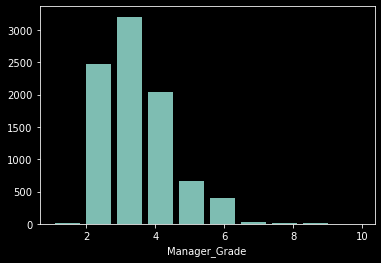

In [9]:
plt.hist(df['Manager_Grade'],alpha=0.9, rwidth=0.8)
plt.xlabel('Manager_Grade')      # This is a bit right-skewed

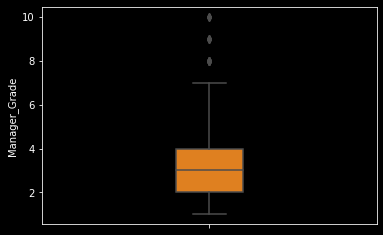

In [10]:
sns.boxplot(y=df['Manager_Grade'],data=df,width=.2,palette='autumn')     # There are three points lying outside the max value 

In [11]:
# We have defined a function for detecting outliers based on the inter-quantile range
def detect_outliers(data):
    points=[]
    sorted(data)
    q1,q3=np.percentile(data,[25,75])
    iqr=q3-q1
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3+(1.5*iqr)
    for i in data:
        if i > lower_bound and i < upper_bound:
            points.append(i)
            outliers_points=list(set(data)-set(points))
    return outliers_points

print(detect_outliers(df['Manager_Grade']))  # There are 4 outliers in Manager_Grade column

[8.0, 9.0, 10.0, 7.0]


Text(0.5, 0, 'Manager_Num_Application')

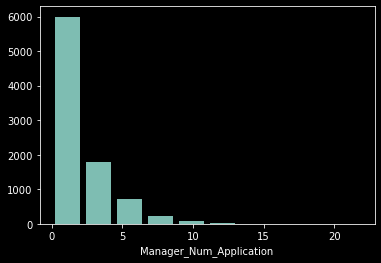

In [12]:
plt.hist(df['Manager_Num_Application'],alpha=0.9, rwidth=0.8)
plt.xlabel('Manager_Num_Application')       # Most of the managers haven't received any application

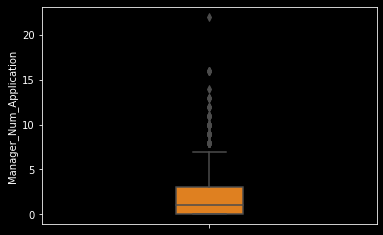

In [13]:
sns.boxplot(y=df['Manager_Num_Application'],data=df,width=.2,palette='autumn') 

In [14]:
print(detect_outliers(df['Manager_Num_Application']))  # There are 9 outliers in this column

[8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 16.0, 22.0]


Text(0.5, 0, 'Manager_Num_Coded')

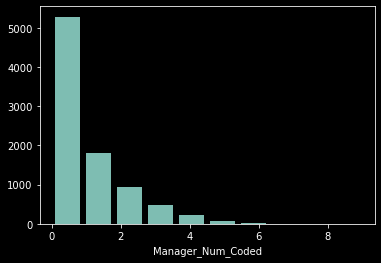

In [15]:
plt.hist(df['Manager_Num_Coded'],alpha=0.9, rwidth=0.8)
plt.xlabel('Manager_Num_Coded')    # There are many managers who haven't recruited any agent in the past 3 months

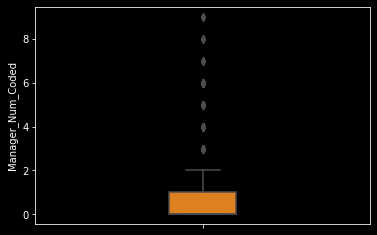

In [16]:
sns.boxplot(y=df['Manager_Num_Coded'],data=df,width=.2,palette='autumn') 

In [17]:
print(detect_outliers(df['Manager_Num_Coded']))  

[3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]


Text(0.5, 0, 'Manager_Business')

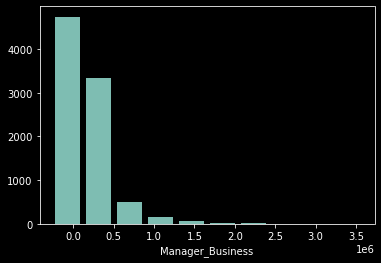

In [18]:
plt.hist(df['Manager_Business'],alpha=0.9, rwidth=0.8)
plt.xlabel('Manager_Business')  

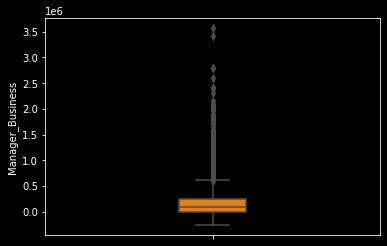

In [19]:
sns.boxplot(y=df['Manager_Business'],data=df,width=.2,palette='autumn') 

Text(0.5, 0, 'Manager_Num_Products')

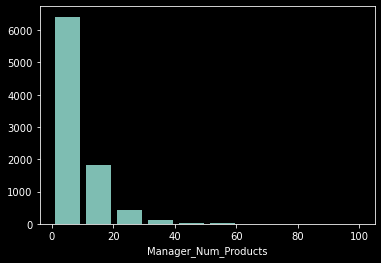

In [20]:
plt.hist(df['Manager_Num_Products'],alpha=0.9, rwidth=0.8)
plt.xlabel('Manager_Num_Products')  

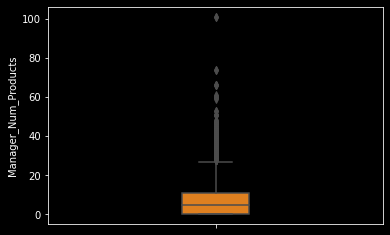

In [21]:
sns.boxplot(y=df['Manager_Num_Products'],data=df,width=.2,palette='autumn') 

Text(0.5, 0, 'Manager_Business2')

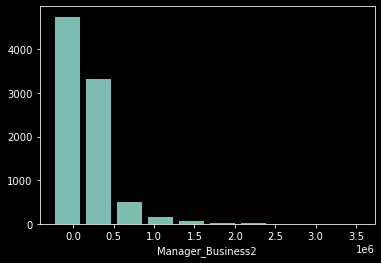

In [22]:
plt.hist(df['Manager_Business2'],alpha=0.9, rwidth=0.8)
plt.xlabel('Manager_Business2')  

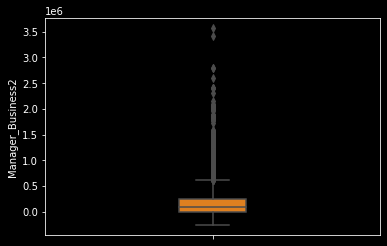

In [23]:
sns.boxplot(y=df['Manager_Business2'],data=df,width=.2,palette='autumn') 

Text(0.5, 0, 'Manager_Num_Products2')

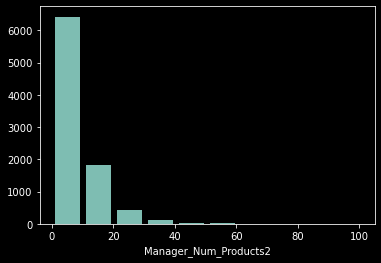

In [24]:
plt.hist(df['Manager_Num_Products2'],alpha=0.9, rwidth=0.8)
plt.xlabel('Manager_Num_Products2')  

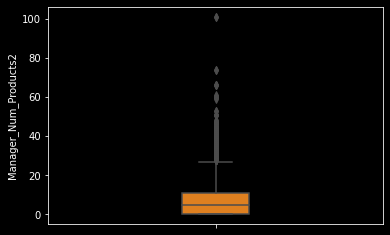

In [25]:
sns.boxplot(y=df['Manager_Num_Products2'],data=df,width=.2,palette='autumn') 

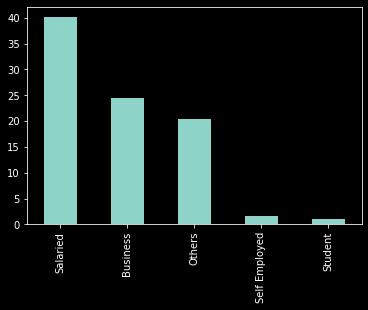

In [26]:
# Categorical Variable
(df['Applicant_Occupation'].value_counts()/len(df['Applicant_Occupation'])*100).plot.bar()   # Frequency Chart

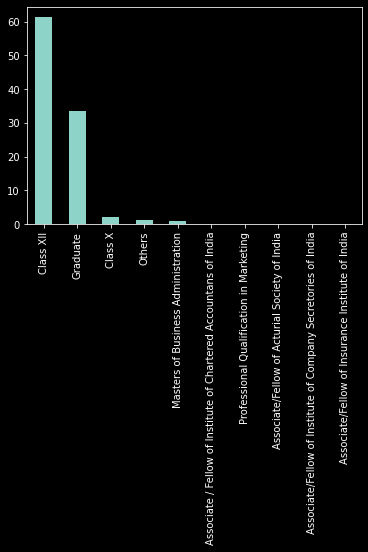

In [27]:
(df['Applicant_Qualification'].value_counts()/len(df['Applicant_Qualification'])*100).plot.bar()

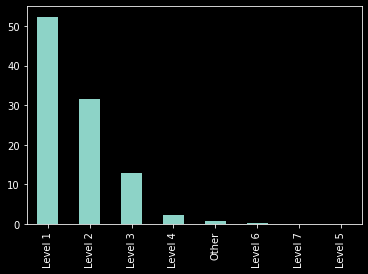

In [28]:
(df['Manager_Joining_Designation'].value_counts()/len(df['Manager_Joining_Designation'])*100).plot.bar()

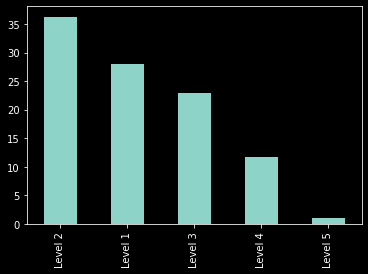

In [29]:
(df['Manager_Current_Designation'].value_counts()/len(df['Manager_Current_Designation'])*100).plot.bar()

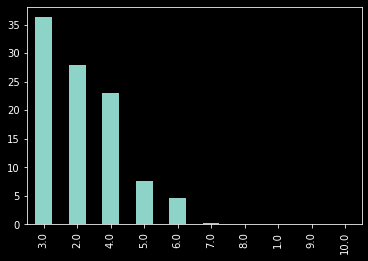

In [30]:
(df['Manager_Grade'].value_counts()/len(df['Manager_Grade'])*100).plot.bar()

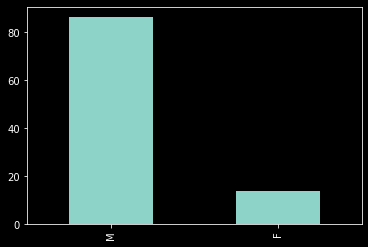

In [31]:
(df['Manager_Gender'].value_counts()/len(df['Manager_Gender'])*100).plot.bar()

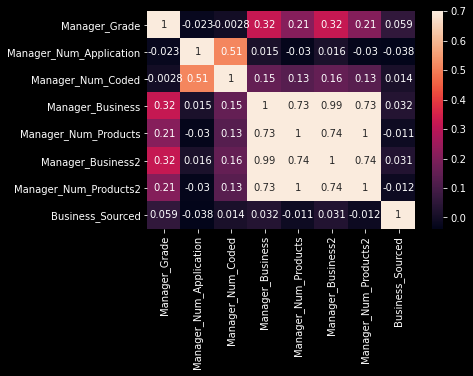

In [32]:
# Checking correlation bw different variables
sns.heatmap(df.drop(['ID','Office_PIN','Applicant_City_PIN'],axis=1).corr(),vmax=.7,cbar=True,annot=True) #Manager_Num_Application and Manager_Num_Coded are strongly correlated and other features such as buisness and products sold are also highly correlated

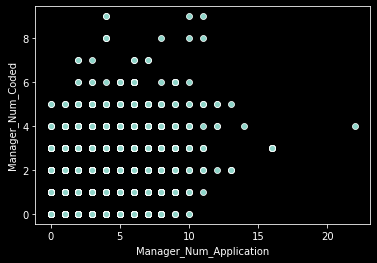

In [33]:
# Bivariate Analysis
# Continuous-Continuous Variable
sns.scatterplot(x='Manager_Num_Application',y='Manager_Num_Coded',data=df,legend='brief') 

In [34]:
# Removing outliers from dataset
df = df.drop(df[(df['Manager_Num_Coded']>2) & (df['Manager_Num_Application']>20)].index)

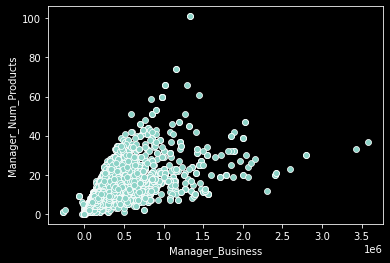

In [35]:
# Continuous-Continuous Variable
sns.scatterplot(x='Manager_Business',y='Manager_Num_Products',data=df,legend='brief') 

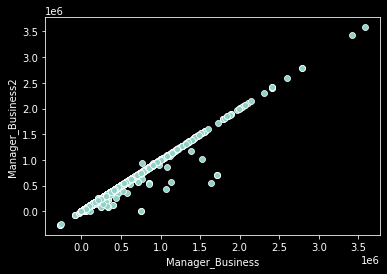

In [36]:
sns.scatterplot(x='Manager_Business',y='Manager_Business2',data=df,legend='brief') 

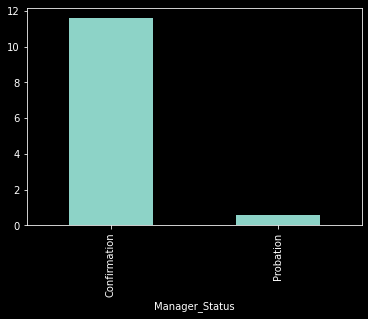

In [37]:
# Categorical -Continuous Bivariate Analysis
df.groupby('Manager_Status')['Manager_Num_Products'].mean().plot.bar()

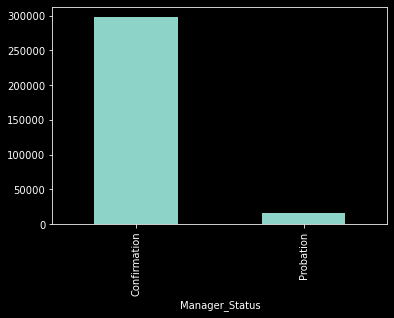

In [38]:
df.groupby('Manager_Status')['Manager_Business'].mean().plot.bar()

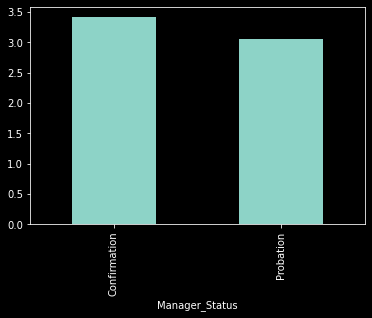

In [39]:
df.groupby('Manager_Status')['Manager_Grade'].mean().plot.bar()

In [40]:
# Categorical -Categorical Bivariate Analysis
pd.crosstab(df['Applicant_Occupation'],df['Business_Sourced'])   # Based on this table ,we can say that most of the applicants recruited and rejected were having salaried jobs

Business_Sourced         0     1
Applicant_Occupation            
Business              1440   717
Others                1134   675
Salaried              2296  1250
Self Employed          146     0
Student                 50    46

In [41]:
pd.crosstab(df['Applicant_Qualification'],df['Business_Sourced'])   # Most people recruited were school pass-outs and graduates

Business_Sourced                                       0     1
Applicant_Qualification                                       
Associate / Fellow of Institute of Chartered Ac...     2     1
Associate/Fellow of Acturial Society of India          1     0
Associate/Fellow of Institute of Company Secret...     1     0
Associate/Fellow of Insurance Institute of India       0     1
Class X                                              142    53
Class XII                                           3642  1784
Graduate                                            1851  1107
Masters of Business Administration                    44    27
Others                                                59    57
Professional Qualification in Marketing                0     1

In [42]:
pd.crosstab(df['Manager_Current_Designation'],df['Business_Sourced']) # Most people were recruited by level 1 and 2 managers

Business_Sourced                0     1
Manager_Current_Designation            
Level 1                      1701   777
Level 2                      2114  1094
Level 3                      1335   698
Level 4                       604   427
Level 5                        58    35

In [43]:
pd.crosstab(df['Manager_Joining_Designation'],df['Business_Sourced']) # Most people were recruited by level 1 and 2 managers

Business_Sourced                0     1
Manager_Joining_Designation            
Level 1                      3101  1530
Level 2                      1827   960
Level 3                       731   415
Level 4                        99   101
Level 5                         1     0
Level 6                         7    11
Level 7                         1     1
Other                          45    13

In [44]:
# This doesn't tell us the whole story so we perform chi-square test
from scipy import stats
stats.chi2_contingency(pd.crosstab(df['Applicant_Qualification'],df['Business_Sourced']))  # First value is chi-square statistic and second is the p-value which is slightly greater than 0.05

(38.334310119861435,
 1.5181140548065486e-05,
 9,
 array([[1.96352445e+00, 1.03647555e+00],
        [6.54508150e-01, 3.45491850e-01],
        [6.54508150e-01, 3.45491850e-01],
        [6.54508150e-01, 3.45491850e-01],
        [1.27629089e+02, 6.73709107e+01],
        [3.55136122e+03, 1.87463878e+03],
        [1.93603511e+03, 1.02196489e+03],
        [4.64700787e+01, 2.45299213e+01],
        [7.59229454e+01, 4.00770546e+01],
        [6.54508150e-01, 3.45491850e-01]]))

In [45]:
stats.chi2_contingency(pd.crosstab(df['Applicant_Occupation'],df['Business_Sourced']))   # Here p-value is very much less than 0.05

(92.97828544294016,
 3.0663108333320153e-19,
 4,
 array([[1409.25483621,  747.74516379],
        [1181.89244261,  627.10755739],
        [2316.74438999, 1229.25561001],
        [  95.38767088,   50.61232912],
        [  62.7206603 ,   33.2793397 ]]))

In [46]:
# Treating Missing Values
df.isnull().sum()

ID                                0
Office_PIN                        0
Applicant_City_PIN                0
Applicant_Gender                 52
Applicant_Marital_Status         58
Applicant_Occupation           1089
Applicant_Qualification          70
Manager_Joining_Designation       0
Manager_Current_Designation       0
Manager_Grade                     0
Manager_Status                    0
Manager_Gender                    0
Manager_Num_Application           0
Manager_Num_Coded                 0
Manager_Business                  0
Manager_Num_Products              0
Manager_Business2                 0
Manager_Num_Products2             0
Business_Sourced                  0
dtype: int64

In [47]:
df['Applicant_Gender'].fillna(df['Applicant_Gender'].mode()[0], inplace=True) # Filling Applicant's Gender

In [48]:
df['Applicant_Marital_Status'].fillna(df['Applicant_Marital_Status'].mode()[0], inplace=True) # Filling Applicant's Marital_Status

In [49]:
df['Applicant_Occupation'].fillna(df['Applicant_Occupation'].mode()[0], inplace=True) # Filling Applicant's Occupation

In [50]:
df['Applicant_Qualification'].fillna(df['Applicant_Qualification'].mode()[0], inplace=True) # Filling Applicant's Qualification

In [51]:
df=df.drop(['ID'],axis=1)

In [52]:
df=df.drop(['Office_PIN'],axis=1)

In [53]:
df=df.drop(['Applicant_City_PIN'],axis=1)

In [54]:
tmp=pd.DataFrame(index=df.columns)
tmp['data_type']=df.dtypes
tmp['unique_values']=df.nunique()
tmp

data_type  unique_values
Applicant_Gender               object              2
Applicant_Marital_Status       object              4
Applicant_Occupation           object              5
Applicant_Qualification        object             10
Manager_Joining_Designation    object              8
Manager_Current_Designation    object              5
Manager_Grade                 float64             10
Manager_Status                 object              2
Manager_Gender                 object              2
Manager_Num_Application       float64             16
Manager_Num_Coded             float64             10
Manager_Business              float64           3746
Manager_Num_Products          float64             57
Manager_Business2             float64           3742
Manager_Num_Products2         float64             57
Business_Sourced                int64              2

In [55]:
df['Manager_Grade']=df['Manager_Grade'].astype('object')

In [56]:
df['Manager_Num_Coded']=df['Manager_Num_Coded'].astype('object')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8843 entries, 0 to 8843
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Applicant_Gender             8843 non-null   object 
 1   Applicant_Marital_Status     8843 non-null   object 
 2   Applicant_Occupation         8843 non-null   object 
 3   Applicant_Qualification      8843 non-null   object 
 4   Manager_Joining_Designation  8843 non-null   object 
 5   Manager_Current_Designation  8843 non-null   object 
 6   Manager_Grade                8843 non-null   object 
 7   Manager_Status               8843 non-null   object 
 8   Manager_Gender               8843 non-null   object 
 9   Manager_Num_Application      8843 non-null   float64
 10  Manager_Num_Coded            8843 non-null   object 
 11  Manager_Business             8843 non-null   float64
 12  Manager_Num_Products         8843 non-null   float64
 13  Manager_Business2 

In [58]:
df['Manager_Joining_Designation'].unique()

array(['Level 1', 'Level 2', 'Other', 'Level 3', 'Level 7', 'Level 5',
       'Level 4', 'Level 6'], dtype=object)

In [59]:
# Grouping Designation
def group_desig(code):
    if code in ['Level 6','Level 7','Other']:
        return "Other"
    else:
        return code
    
df['Manager_Joining_Designation'] = df['Manager_Joining_Designation'].apply(group_desig)

In [60]:
df['Manager_Joining_Designation'].unique()

array(['Level 1', 'Level 2', 'Other', 'Level 3', 'Level 5', 'Level 4'],
      dtype=object)

In [61]:
df['Applicant_Qualification'].unique()

array(['Graduate', 'Class XII', 'Class X',
       'Masters of Business Administration',
       'Associate/Fellow of Institute of Company Secretories of India',
       'Associate / Fellow of Institute of Chartered Accountans of India',
       'Others', 'Associate/Fellow of Insurance Institute of India',
       'Associate/Fellow of Acturial Society of India',
       'Professional Qualification in Marketing'], dtype=object)

In [62]:
# Grouping Qualification
def group_qual(code):
    if code in ['Associate/Fellow of Institute of Company Secretories of India','Masters of Business Administration','Associate / Fellow of Institute of Chartered Accountans of India','Associate/Fellow of Insurance Institute of India']:
        return "Higher_Qualifications"
    else:
        return code
    
df['Applicant_Qualification'] = df['Applicant_Qualification'].apply(group_qual)

In [63]:
df['Manager_Num_Products']=df['Manager_Num_Products'].astype('float')

In [64]:
df['Manager_Num_Products2']=df['Manager_Num_Products2'].astype('float')

In [65]:
tmp=pd.DataFrame(index=df.columns)
tmp['data_type']=df.dtypes
tmp['unique_values']=df.nunique()
tmp

data_type  unique_values
Applicant_Gender               object              2
Applicant_Marital_Status       object              4
Applicant_Occupation           object              5
Applicant_Qualification        object              7
Manager_Joining_Designation    object              6
Manager_Current_Designation    object              5
Manager_Grade                  object             10
Manager_Status                 object              2
Manager_Gender                 object              2
Manager_Num_Application       float64             16
Manager_Num_Coded              object             10
Manager_Business              float64           3746
Manager_Num_Products          float64             57
Manager_Business2             float64           3742
Manager_Num_Products2         float64             57
Business_Sourced                int64              2

In [66]:
# Converting all categorical variables into continuous variables
df=pd.get_dummies(df)
df.shape

(8843, 59)

In [67]:
# Splitting into features and labels
x = df.drop(['Business_Sourced'],axis=1)
y = df['Business_Sourced']
x.shape,y.shape

((8843, 58), (8843,))

In [68]:
# Scaling Features
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [69]:
x = pd.DataFrame(x_scaled, columns = x.columns)

In [70]:
x.head()

Manager_Num_Application  Manager_Business  Manager_Num_Products  \
0                    0.125          0.156245              0.277228   
1                    0.125          0.156245              0.277228   
2                    0.000          0.161952              0.237624   
3                    0.000          0.151850              0.217822   
4                    0.125          0.128967              0.168317   

   Manager_Business2  Manager_Num_Products2  Applicant_Gender_F  \
0           0.156245               0.277228                 0.0   
1           0.156245               0.277228                 0.0   
2           0.161952               0.237624                 0.0   
3           0.151850               0.217822                 0.0   
4           0.128967               0.168317                 0.0   

   Applicant_Gender_M  Applicant_Marital_Status_D  Applicant_Marital_Status_M  \
0                 1.0                         0.0                         1.0   
1                 1.0                         0.0                         0.0   
2                 1.0                         0.0                         1.0   
3                 1.0                         0.0                         0.0   
4                 1.0                         0.0                         1.0   

   Applicant_Marital_Status_S  ...  Manager_Num_Coded_0.0  \
0                         0.0  ...                    0.0   
1                         1.0  ...                    0.0   
2                         0.0  ...                    1.0   
3                         1.0  ...                    1.0   
4                         0.0  ...                    0.0   

   Manager_Num_Coded_1.0  Manager_Num_Coded_2.0  Manager_Num_Coded_3.0  \
0                    1.0                    0.0                    0.0   
1                    1.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    1.0                    0.0                    0.0   

   Manager_Num_Coded_4.0  Manager_Num_Coded_5.0  Manager_Num_Coded_6.0  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   Manager_Num_Coded_7.0  Manager_Num_Coded_8.0  Manager_Num_Coded_9.0  
0                    0.0                    0.0                    0.0  
1                    0.0                    0.0                    0.0  
2                    0.0                    0.0                    0.0  
3                    0.0                    0.0                    0.0  
4                    0.0                    0.0                    0.0  

[5 rows x 58 columns]

In [71]:
# Splitting into train and test sets
train_x, valid_x, train_y, valid_y= train_test_split(x, y, test_size = 0.3, random_state=19,stratify=y)

In [72]:
log_reg = LogisticRegression()
log_reg.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
pred_train = log_reg.predict_proba(train_x)
pred_valid = log_reg.predict_proba(valid_x)

In [74]:
roc_auc_score(train_y, pred_train[:,1])

0.6038650667215304

In [75]:
roc_auc_score(valid_y, pred_valid[:,1])

0.57882061141894

In [76]:
df.to_csv('agent_data.csv',header=True)

In [99]:
# RANDOM FOREST

In [79]:
df=pd.read_csv('agent_data.csv')
df.head()

Unnamed: 0  Manager_Num_Application  Manager_Business  \
0           0                      2.0          335249.0   
1           1                      2.0          335249.0   
2           2                      0.0          357184.0   
3           3                      0.0          318356.0   
4           4                      2.0          230402.0   

   Manager_Num_Products  Manager_Business2  Manager_Num_Products2  \
0                  28.0           335249.0                   28.0   
1                  28.0           335249.0                   28.0   
2                  24.0           357184.0                   24.0   
3                  22.0           318356.0                   22.0   
4                  17.0           230402.0                   17.0   

   Business_Sourced  Applicant_Gender_F  Applicant_Gender_M  \
0                 0                   0                   1   
1                 1                   0                   1   
2                 0                   0                   1   
3                 0                   0                   1   
4                 0                   0                   1   

   Applicant_Marital_Status_D  ...  Manager_Num_Coded_0.0  \
0                           0  ...                      0   
1                           0  ...                      0   
2                           0  ...                      1   
3                           0  ...                      1   
4                           0  ...                      0   

   Manager_Num_Coded_1.0  Manager_Num_Coded_2.0  Manager_Num_Coded_3.0  \
0                      1                      0                      0   
1                      1                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      1                      0                      0   

   Manager_Num_Coded_4.0  Manager_Num_Coded_5.0  Manager_Num_Coded_6.0  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   Manager_Num_Coded_7.0  Manager_Num_Coded_8.0  Manager_Num_Coded_9.0  
0                      0                      0                      0  
1                      0                      0                      0  
2                      0                      0                      0  
3                      0                      0                      0  
4                      0                      0                      0  

[5 rows x 60 columns]

In [88]:
df.rename(columns={'Unnamed: 0':'ID'},inplace=True)

In [89]:
df.head()

ID  Manager_Num_Application  Manager_Business  Manager_Num_Products  \
0   0                      2.0          335249.0                  28.0   
1   1                      2.0          335249.0                  28.0   
2   2                      0.0          357184.0                  24.0   
3   3                      0.0          318356.0                  22.0   
4   4                      2.0          230402.0                  17.0   

   Manager_Business2  Manager_Num_Products2  Business_Sourced  \
0           335249.0                   28.0                 0   
1           335249.0                   28.0                 1   
2           357184.0                   24.0                 0   
3           318356.0                   22.0                 0   
4           230402.0                   17.0                 0   

   Applicant_Gender_F  Applicant_Gender_M  Applicant_Marital_Status_D  ...  \
0                   0                   1                           0  ...   
1                   0                   1                           0  ...   
2                   0                   1                           0  ...   
3                   0                   1                           0  ...   
4                   0                   1                           0  ...   

   Manager_Num_Coded_0.0  Manager_Num_Coded_1.0  Manager_Num_Coded_2.0  \
0                      0                      1                      0   
1                      0                      1                      0   
2                      1                      0                      0   
3                      1                      0                      0   
4                      0                      1                      0   

   Manager_Num_Coded_3.0  Manager_Num_Coded_4.0  Manager_Num_Coded_5.0  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   Manager_Num_Coded_6.0  Manager_Num_Coded_7.0  Manager_Num_Coded_8.0  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   Manager_Num_Coded_9.0  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 60 columns]

In [91]:
# Segregating features and labels
x=df.drop(['Business_Sourced'],axis=1)
y=df['Business_Sourced']

In [92]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=110,stratify=y)
train_x.shape,test_x.shape

((6190, 59), (2653, 59))

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
# GridSearchCV
param_grid={'n_estimators':[100,200,300,400,500,600]}   
clf=RandomForestClassifier()
clf_cv=GridSearchCV(clf,param_grid=param_grid,cv=5)
clf_cv.fit(train_x,train_y)
print("Tuned Decision Tree Parameters: {}".format(clf_cv.best_params_)) 
print("Best score is {}".format(clf_cv.best_score_)) 

Tuned Decision Tree Parameters: {'n_estimators': 400}
Best score is 0.6361873990306947


In [94]:
# RandomizedSearchCV
param_dist={'n_estimators':[100,200,300,400,500,600],'criterion':['gini','entropy'],'max_depth':randint(1,15),'max_features':randint(1,9),'min_samples_leaf':randint(1,9)}
clf=RandomForestClassifier()
clf_cv=RandomizedSearchCV(clf,param_distributions=param_dist,cv=5)
clf_cv.fit(train_x,train_y)
print("Tuned Decision Tree Parameters: {}".format(clf_cv.best_params_)) 
print("Best score is {}".format(clf_cv.best_score_)) 

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 7, 'min_samples_leaf': 6, 'n_estimators': 400}
Best score is 0.65718901453958


In [97]:
model=RandomForestClassifier(criterion='entropy',max_depth= 2, max_features= 7, min_samples_leaf=6, n_estimators=400)
model.fit(train_x,train_y)
pred_train_rf = model.predict_proba(train_x)
pred_test_rf = model.predict_proba(test_x)

In [98]:
roc_auc_score(train_y, pred_train_rf[:,1]),roc_auc_score(test_y, pred_test_rf[:,1])

(0.6062245780265181, 0.5832929623237553)